#**Sales Price Prediction**#

Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.

##Importing the necessary packages##

In [45]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Reading Data

In [46]:
df= pd.read_csv('/content/car_purchasing.csv', encoding= 'latin1')

In [47]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [48]:
df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [49]:
df.shape

(500, 9)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


# Exploratory Data Analysis

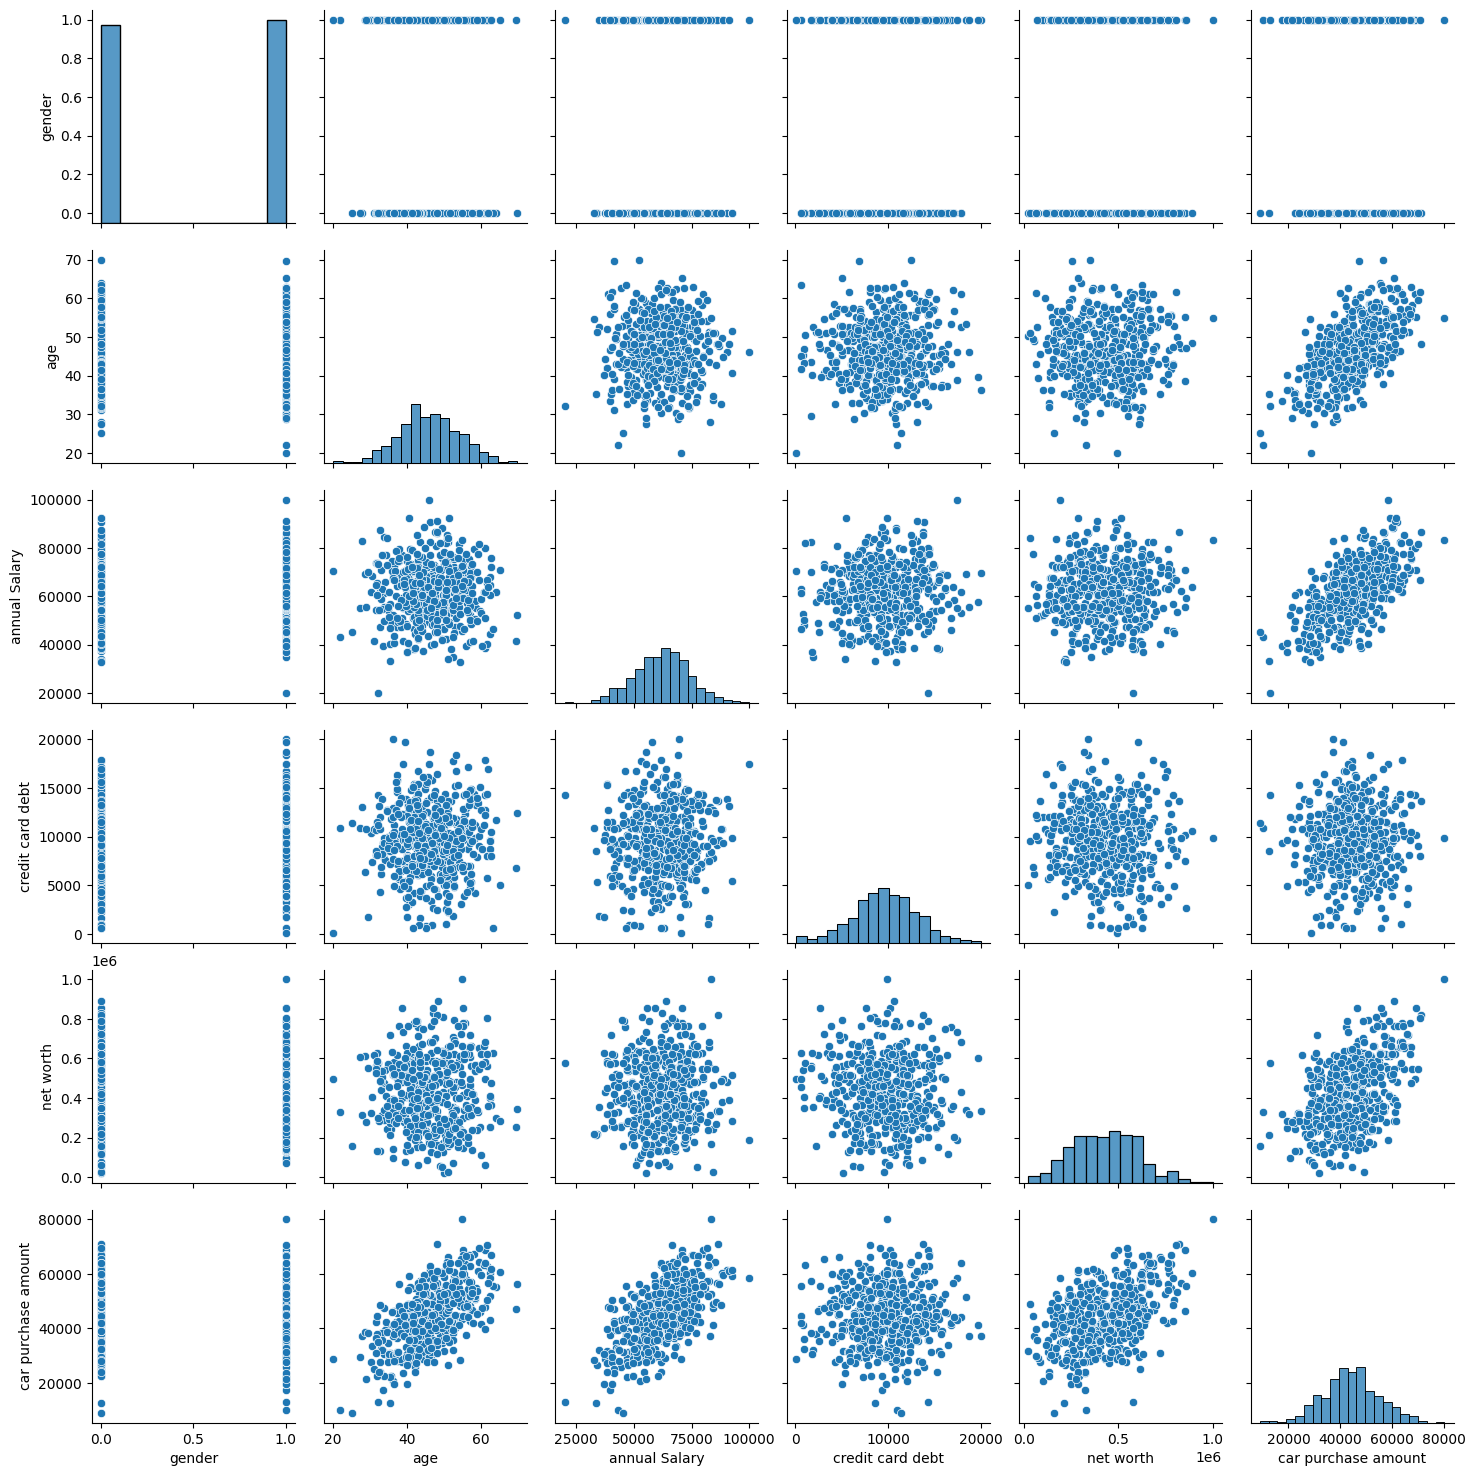

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)

<Axes: >

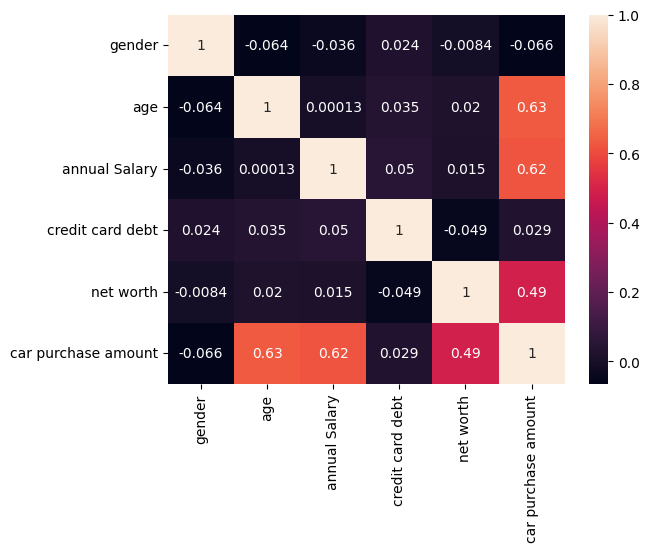

In [52]:
sns.heatmap(df.corr(), annot= True)

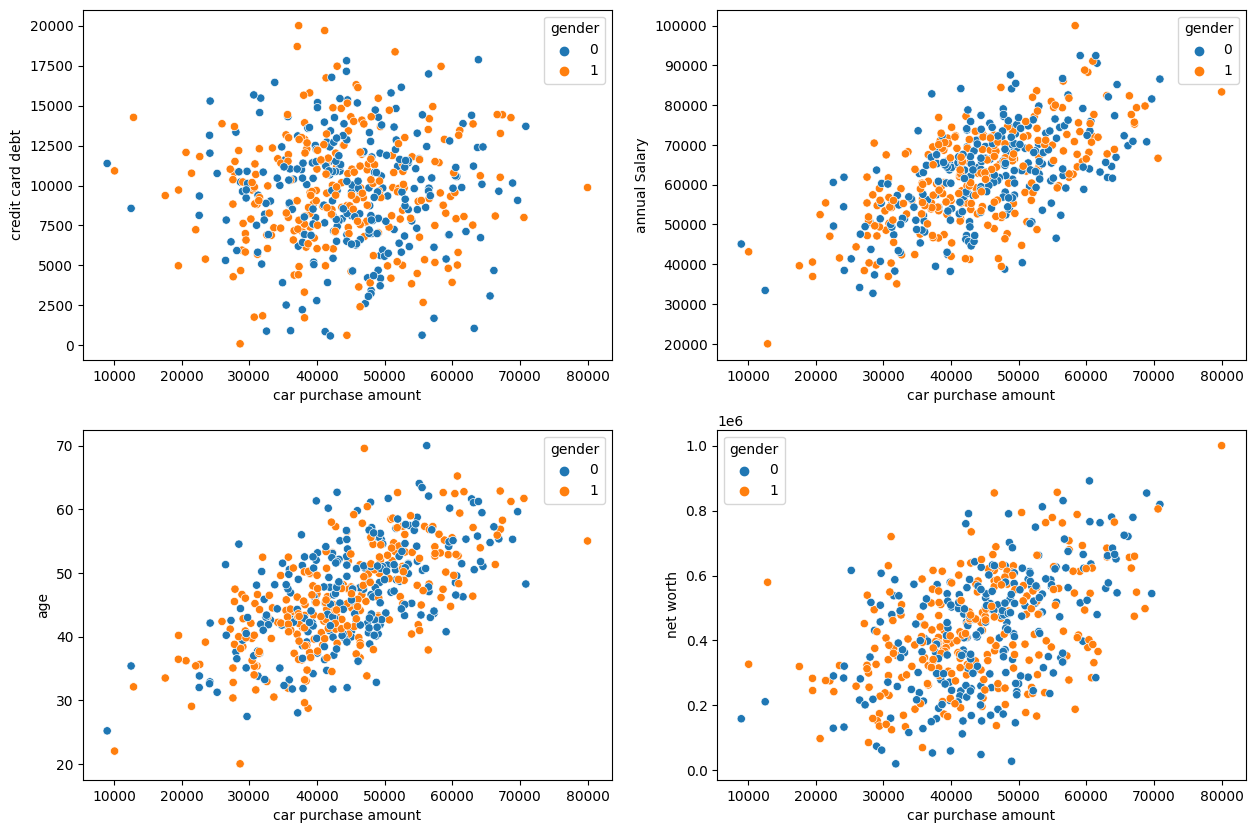

In [53]:
fig,axes = plt.subplots(2,2,figsize=(15,10))
cols =[ 'credit card debt','age', 'annual Salary', 'net worth']
for i in range(4):
    sns.scatterplot(x='car purchase amount', y=cols[i], data=df, ax=axes[i%2,i//2], hue='gender' )

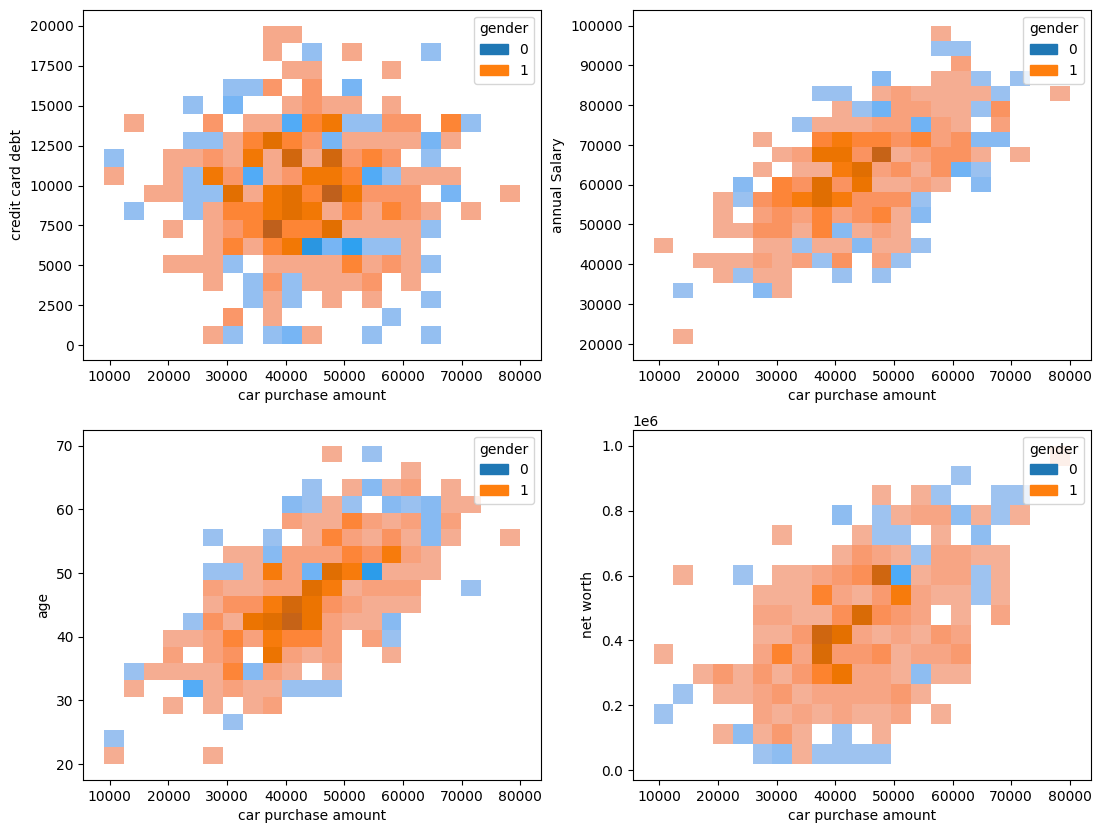

In [54]:
fig,axes = plt.subplots(2,2,figsize=(13,10))
cols =[ 'credit card debt','age', 'annual Salary', 'net worth']
for i in range(4):
    sns.histplot(kde= True, x='car purchase amount', y=cols[i], data=df, ax=axes[i%2,i//2], hue='gender' )

# Data Cleaning and Preprocessing

In [55]:
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

Since there is no missing value, there is no need to do major preprocessing.

## Splitting Data into X and Y

In [56]:
x= df[['gender', 'age', 'annual Salary', 'credit card debt', 'net worth']]
y= df[['car purchase amount']]

In [57]:
x.head()

,gender,age,annual Salary,credit card debt,net worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


In [58]:
y.head()

,car purchase amount
0,35321.45877
1,45115.52566
2,42925.70921
3,67422.36313
4,55915.46248


## Importing ML Libraries

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [60]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=42)

In [61]:
print('x_train shape is :', x_train.shape)
print('x_test shape is :', x_test.shape)
print('y_train shape is :', y_train.shape)
print('y_test shape is :', y_test.shape)

x_train shape is : (400, 5)
x_test shape is : (100, 5)
y_train shape is : (400, 1)
y_test shape is : (100, 1)


In [62]:
y_train

,car purchase amount
249,46135.27233
433,29519.56184
19,54827.52403
322,59625.02618
332,25252.93221
...,...
106,34803.82395
270,12536.93842
348,49348.88394
435,42139.64528


**Using StandardScaler Library to scale the Data**

In [63]:
sc= StandardScaler()
sc.fit_transform(x_train, y_train)

array([[-1.        , -1.22996274,  0.70264523,  0.06782569,  1.14322143],
       [ 1.        , -0.76993543, -0.49583563, -0.85967664, -1.16188481],
       [-1.        ,  1.58484034, -0.55624875,  1.05701072,  0.76354398],
       ...,
       [-1.        , -0.08676592,  0.13289634, -1.67932755,  1.00304384],
       [ 1.        ,  1.48934693, -1.73041723, -0.39436898, -0.06165717],
       [ 1.        , -1.92977493,  0.53060764, -0.63911954, -0.15781448]])

In [64]:

lr= LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
R2_lr= r2_score(y_true=y_test,y_pred=y_pred_lr)
print(f"Model Accuracy: {R2_lr}")

Model Accuracy: 0.9999999806028682


In [67]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

gender = int(input("Enter gender (1 for male, 0 for female): "))
age = int(input("Enter age: "))
annual_salary = float(input("Enter annual salary: "))
credit_card_debt = float(input("Enter credit card debt: "))
net_worth = float(input("Enter net worth: "))


new_data = np.array([[gender, age, annual_salary, credit_card_debt, net_worth]])
new_data_scaled = sc.transform(new_data)
car_price_prediction = lr.predict(new_data_scaled)
print(f"Predicted Car Purchase Amount: {car_price_prediction[0][0]}")

Enter gender (1 for male, 0 for female): 1
Enter age: 30
Enter annual salary: 70000
Enter credit card debt: 2000
Enter net worth: 250000
Predicted Car Purchase Amount: 29708.890499585603
